In [39]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [40]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
x_train = x_train / 255
x_test = x_test / 255

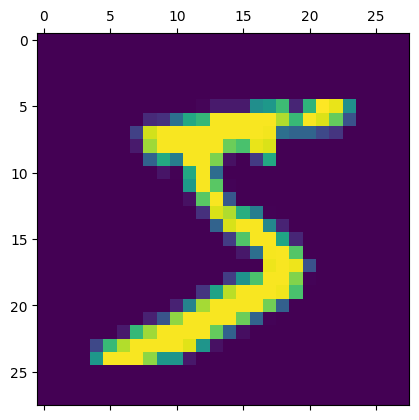

In [42]:
plt.matshow(x_train[0])

In [43]:
# flatten each array of pixels
x_train_flattened = x_train.reshape(len(x_train),28 * 28)
x_test_flattened = x_test.reshape(len(x_test),28 * 28)

In [44]:
 x_train_flattened.shape

(60000, 784)

In [45]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [46]:
# create the neural network layer
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4679 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2841 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9252


In [47]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2697 - accuracy: 0.9249


[0.2697427272796631, 0.9248999953269958]

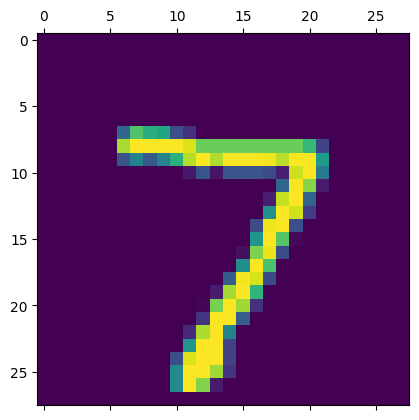

In [48]:
plt.matshow(x_test[0])

In [49]:
# predict with some test data
y_predict = model.predict(x_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [50]:
y_predict[0]

array([2.9302133e-02, 3.3935777e-07, 4.8011295e-02, 9.5890582e-01,
       3.6024870e-03, 1.2032208e-01, 1.5361049e-06, 9.9982905e-01,
       1.0576320e-01, 6.2248880e-01], dtype=float32)

In [52]:
np.argmax(y_predict[0])

7

In [54]:
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [60]:
confusion_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

<Axes: >

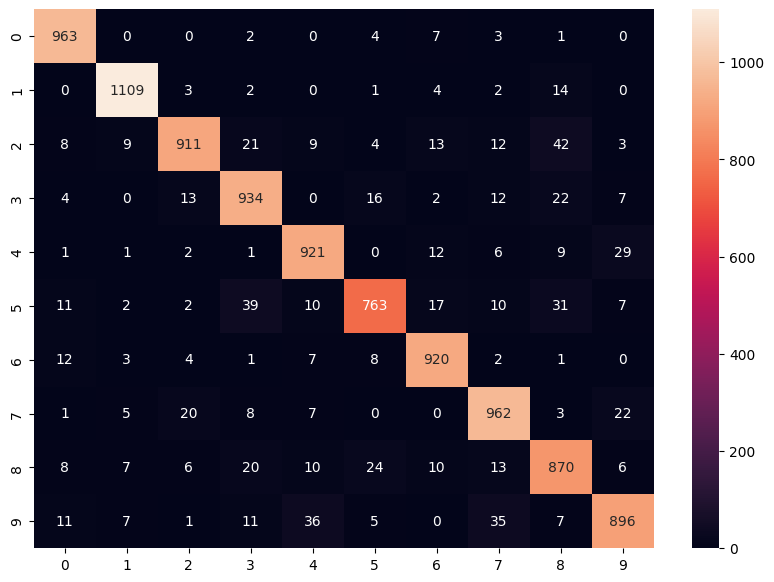

In [67]:
import seaborn as sb
plt.figure(figsize=(10, 7))
sb.heatmap(confusion_mat, annot=True, fmt='d')

In [70]:
# create the neural network layer
model = keras.Sequential(
    [
        keras.layers.Dense(500, input_shape=(784,), activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 28s 14ms/step - loss: 0.2019 - accuracy: 0.9391
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0800 - accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0539 - accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0383 - accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0272 - accuracy: 0.9912


In [74]:
y_predict = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predict]

313/313 [==============================] - 1s 4ms/step


<Axes: >

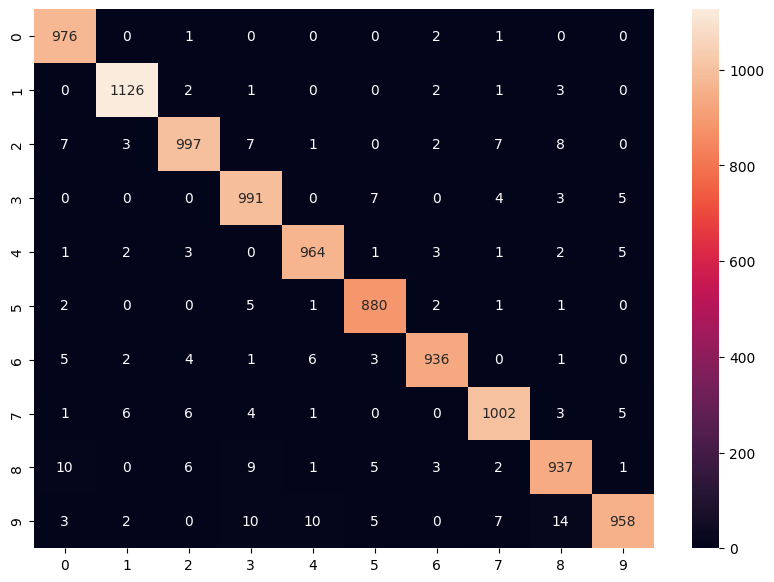

In [75]:
confusion_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10, 7))
sb.heatmap(confusion_mat, annot=True, fmt='d')

In [214]:
# create the neural network layer
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 28s 14ms/step - loss: 0.2000 - accuracy: 0.9404
Epoch 2/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0793 - accuracy: 0.9769
Epoch 3/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0529 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0370 - accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0271 - accuracy: 0.9912


In [215]:
digit_classifier = model

In [216]:
from PIL import Image

In [217]:
image = Image.open("3.png")

In [199]:
image.show()

In [200]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [201]:
print(image)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=472x364 at 0x1FDB38033D0>


In [218]:
image28 = image.resize((28,28))
img_array = np.asarray(image28)

In [219]:
# convert image to grayscale
img_array = np.dot(img_array[...,:3], [0.299, 0.587, 0.114])

In [220]:
img_array

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 253.,
        224., 183., 136.,  99.,  88., 110., 224., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 210., 125.,  44.,
         18.,  25.,  52.,  80., 107.,  17.,  99., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255

In [221]:
img_array = 255 - img_array
img_array = img_array / 255

In [222]:
img_array

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

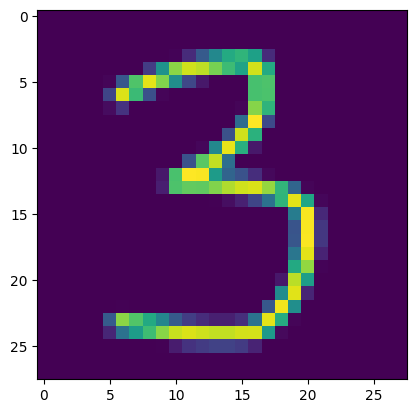

In [223]:
plt.imshow(img_array)

In [224]:
img_array.shape

(28, 28)

In [225]:
predicted = digit_classifier.predict(np.array([img_array]))

1/1 [==============================] - 0s 167ms/step


In [226]:
np.argmax(predicted)

3

In [227]:
import pickle
model_filename = 'digit_classifier_modified.sav'
pickle.dump(digit_classifier, open(model_filename, 'wb'))